<a href="https://colab.research.google.com/github/KillerStrike17/EVA---Session-10-VGG/blob/master/Session_10_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 10 VGG Network


## **Import Libraries and modules**

In [1]:
# Importing all the required Libraries
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
!pip install keract
from keras.datasets import mnist

Using TensorFlow backend.


# VGG Model

Here we are loading the pretrained VGG model.



In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2

Loading image net weighs to the model
Loading the summary of the model to know all the layers in it which have to be used to provide a gradcam of the image over previous two layers to block5_conv3

In [3]:
model = VGG16(weights="imagenet")
model.summary()


W0726 23:04:37.948452 140639595181952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 23:04:37.998655 140639595181952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 23:04:38.007879 140639595181952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 23:04:38.052642 140639595181952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 23s 0us/step


W0726 23:05:02.221107 140639595181952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0726 23:05:02.222876 140639595181952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

The Layers that come above block5_conv3 are :-
block5_conv2 and block5_conv1

This is gradcam function, 
It takes the layer and input image as parameter and then plots a heatmap over that image in that layer and returns the output.

In [0]:
def gradcam(layer, x):

  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
  
  return superimposed_img

180
180
180


Text(0.5, 1.0, 'block5_conv1 gradcam image')

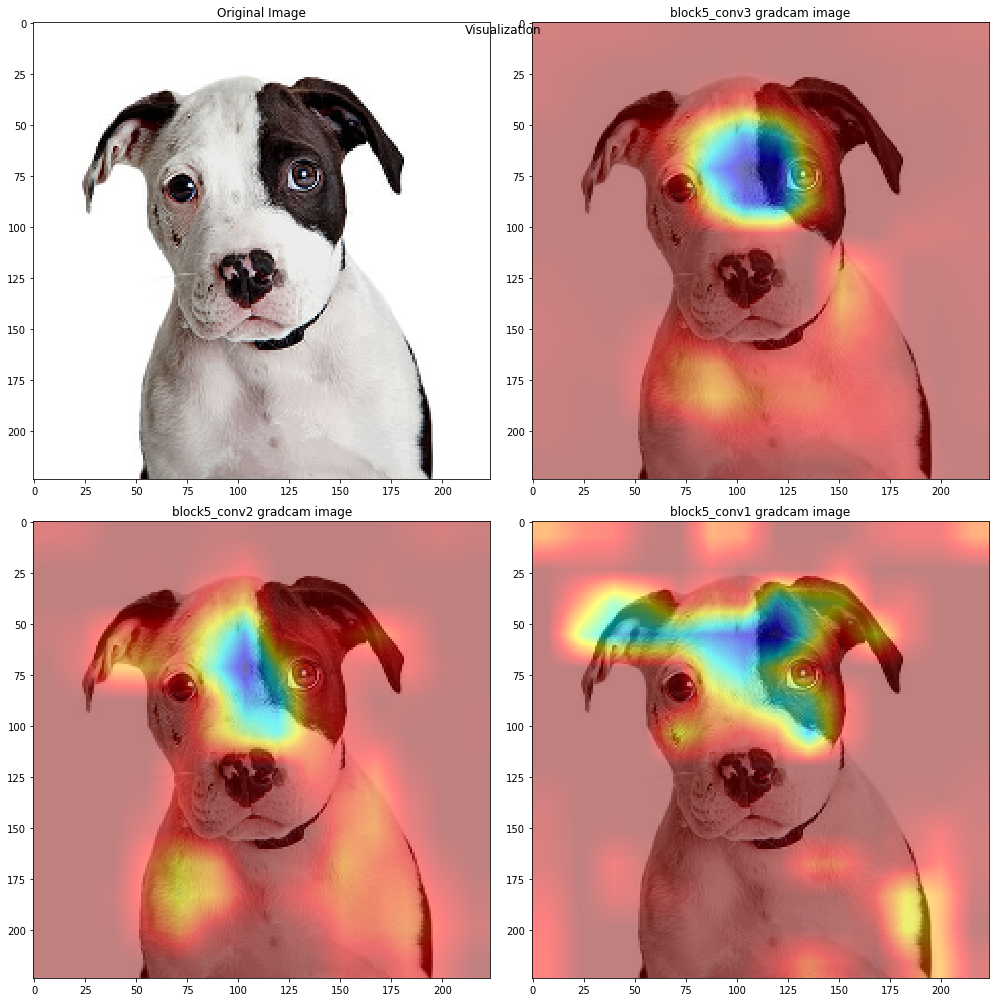

In [8]:
# Loading the image and rescaling its size to 224x224 because VGG can only take
# input data of those size else it will crash.
from skimage import io
dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")
dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


#creating subplots to show output together
fig, ax = plt.subplots(2, 2, figsize = (14, 14))
  
fig.tight_layout()
fig.suptitle('Visualization')

#original Image
ax[0,0].imshow(dog)
ax[0,0].set_title("Original Image")

#output Derived in session
ax[0,1].imshow(gradcam("block5_conv3", x))
ax[0,1].set_title("block5_conv3 gradcam image")

#layer before block5_conv3
ax[1,0].imshow(gradcam("block5_conv2", x))
ax[1,0].set_title("block5_conv2 gradcam image")

#layer before block5_conv2
ax[1,1].imshow(gradcam("block5_conv1", x))
ax[1,1].set_title("block5_conv1 gradcam image")

In [10]:

def gradcam(layer, x,classid):

  #preds = model.predict(x)
  #class_idx = np.argmax(preds[0])
  #print(class_idx)
  class_idx = 836
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
  
  return superimposed_img

tonystark = io.imread("https://github.com/KillerStrike17/EVA---Session-10-VGG/blob/master/Shubham%20Agnihotri.jpg")
tonystark = cv2.resize(tonystark, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(tonystark)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


#creating subplots to show output together
fig, ax = plt.subplots(2, 2, figsize = (14, 14))
  
fig.tight_layout()
fig.suptitle('Visualization')

#original Image
ax[0,0].imshow(tonystark)
ax[0,0].set_title("Original Image")

#output Derived in session
ax[0,1].imshow(gradcam("block5_conv3", x))
ax[0,1].set_title("block5_conv3 gradcam image")

#layer before block5_conv3
ax[1,0].imshow(gradcam("block5_conv2", x))
ax[1,0].set_title("block5_conv2 gradcam image")

#layer before block5_conv2
ax[1,1].imshow(gradcam("block5_conv1", x))
ax[1,1].set_title("block5_conv1 gradcam image")


AttributeError: ignored

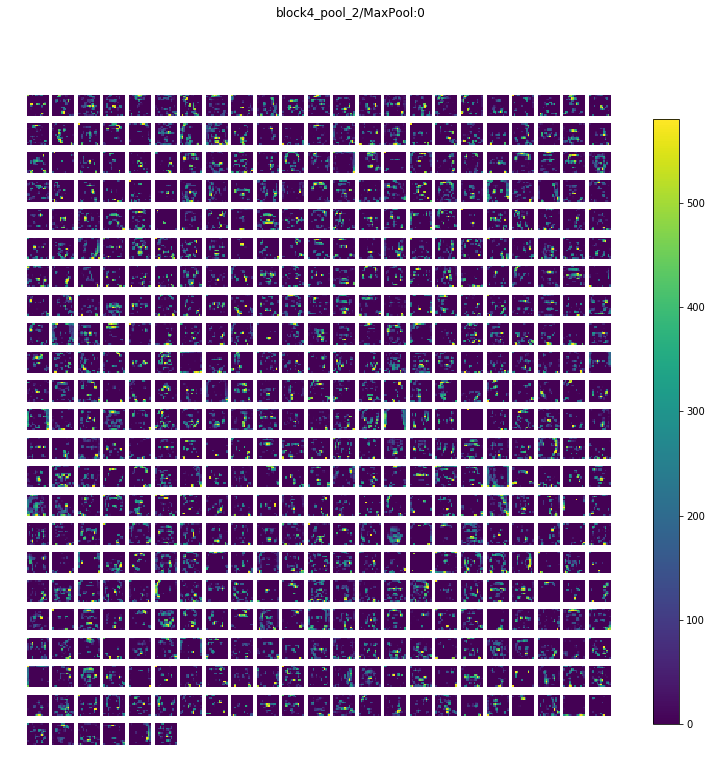

block5_conv1_2/Relu:0 (1, 14, 14, 512) 


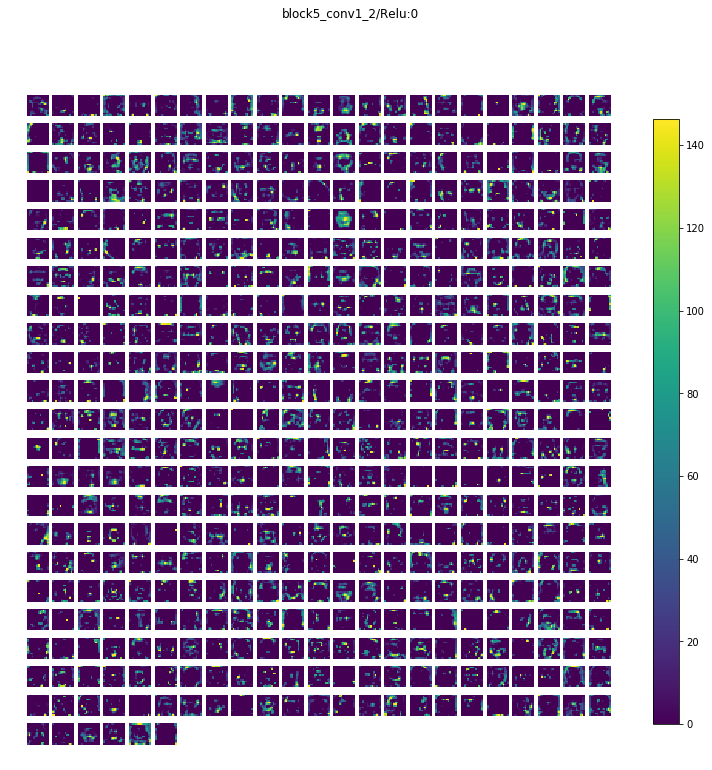

block5_conv2_2/Relu:0 (1, 14, 14, 512) 


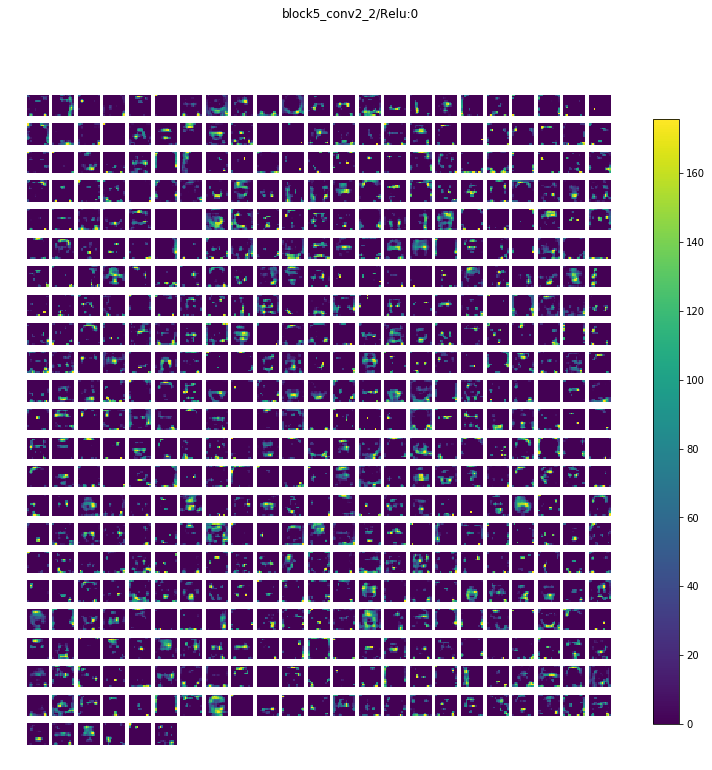

block5_conv3_2/Relu:0 (1, 14, 14, 512) 


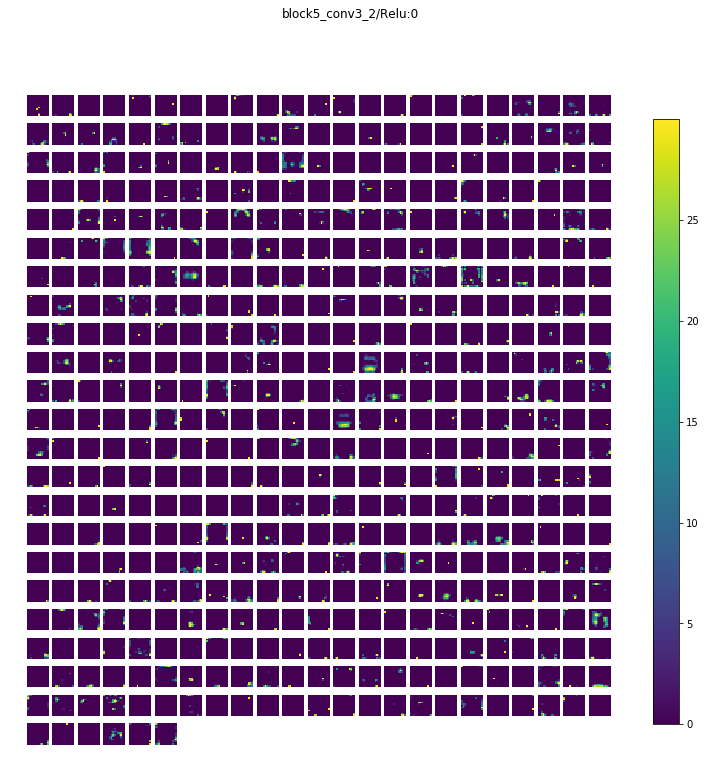

block5_pool_2/MaxPool:0 (1, 7, 7, 512) 


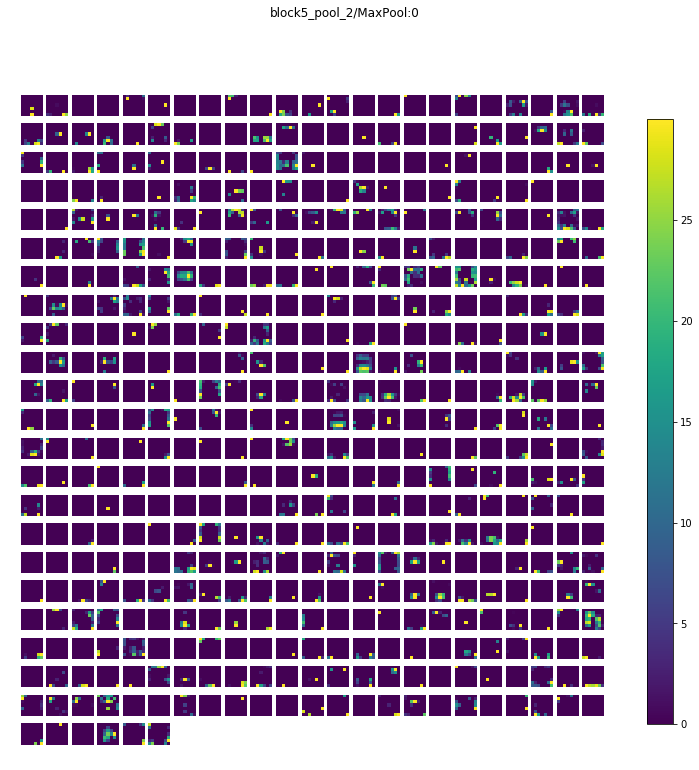

flatten_2/Reshape:0 (1, 25088) -> Skipped. 2D Activations.
fc1_2/Relu:0 (1, 4096) -> Skipped. 2D Activations.
fc2_2/Relu:0 (1, 4096) -> Skipped. 2D Activations.
predictions_2/Softmax:0 (1, 1000) -> Skipped. 2D Activations.
sunglasses (31.672731041908264)
input_5:0 (224, 224, 3) -> Skipped. First dimension is not 1.
block1_conv1_4/Relu:0 (1, 224, 224, 64) 


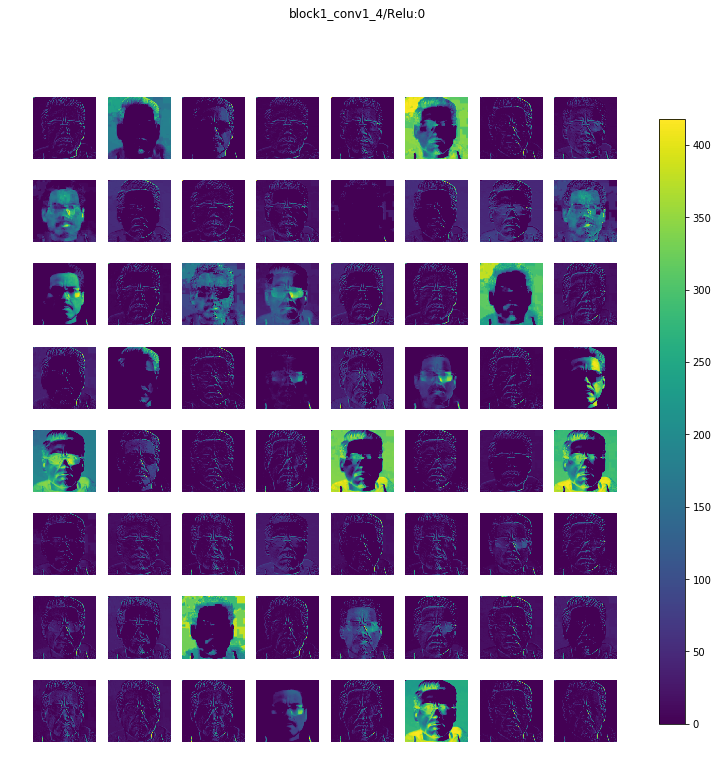

block1_conv2_4/Relu:0 (1, 224, 224, 64) 


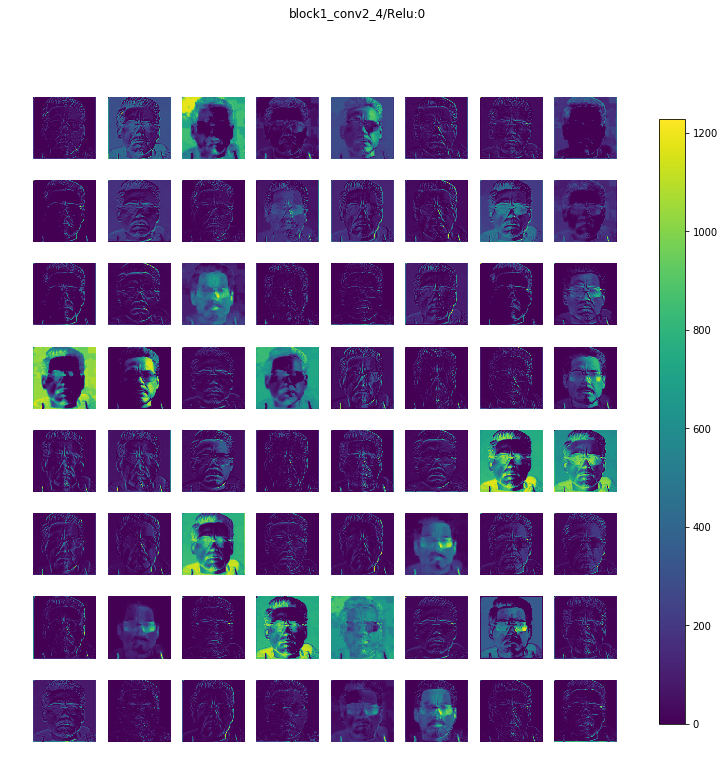

block1_pool_4/MaxPool:0 (1, 112, 112, 64) 


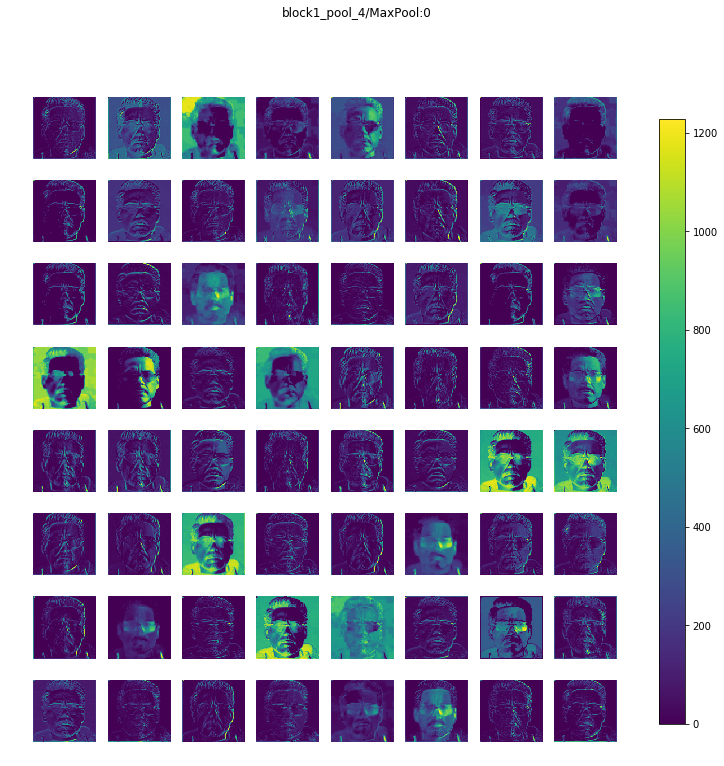

block2_conv1_4/Relu:0 (1, 112, 112, 128) 


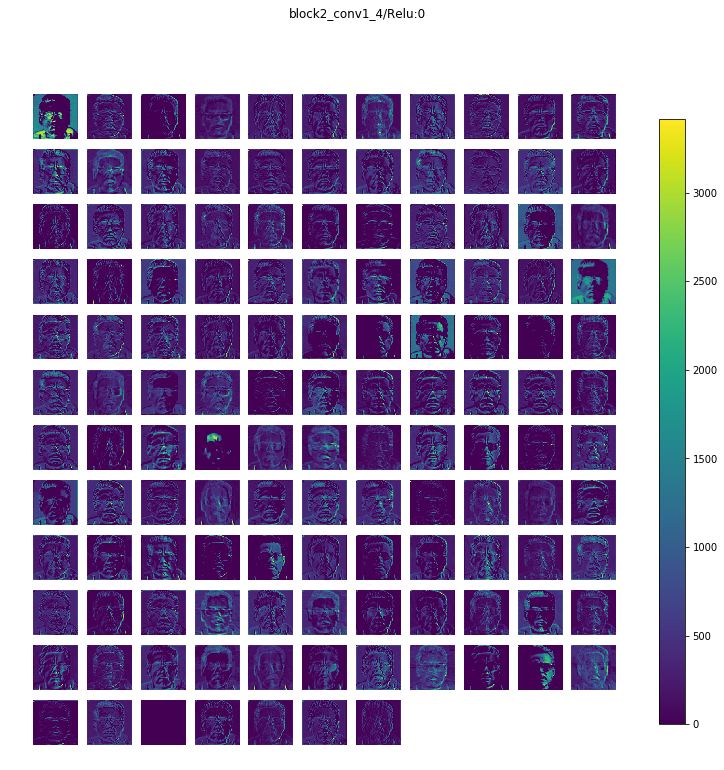

block2_conv2_4/Relu:0 (1, 112, 112, 128) 


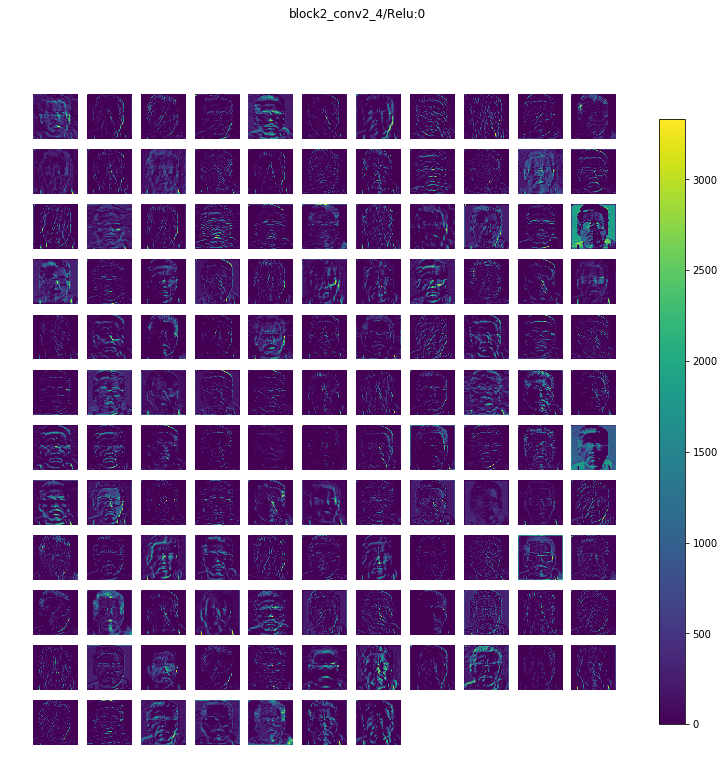

block2_pool_4/MaxPool:0 (1, 56, 56, 128) 


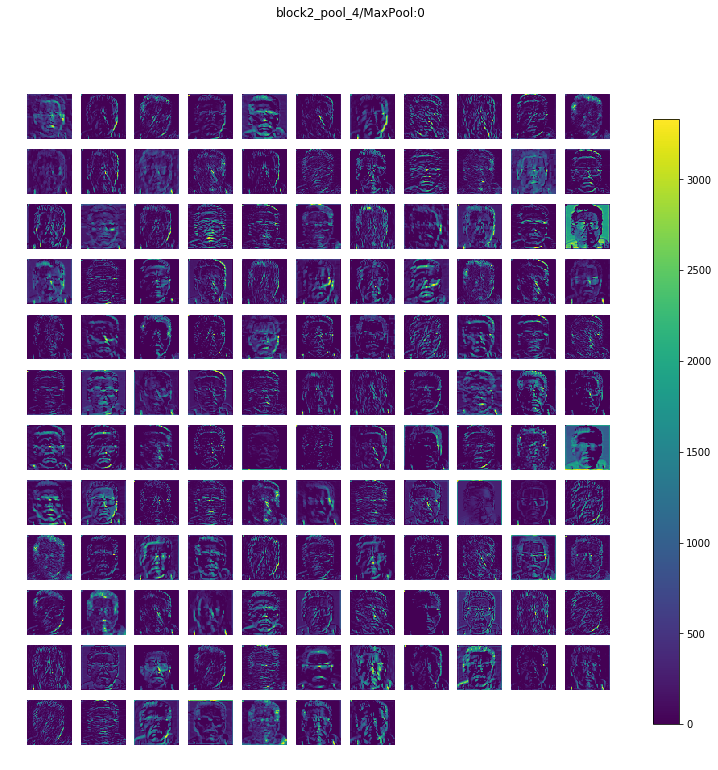

block3_conv1_4/Relu:0 (1, 56, 56, 256) 


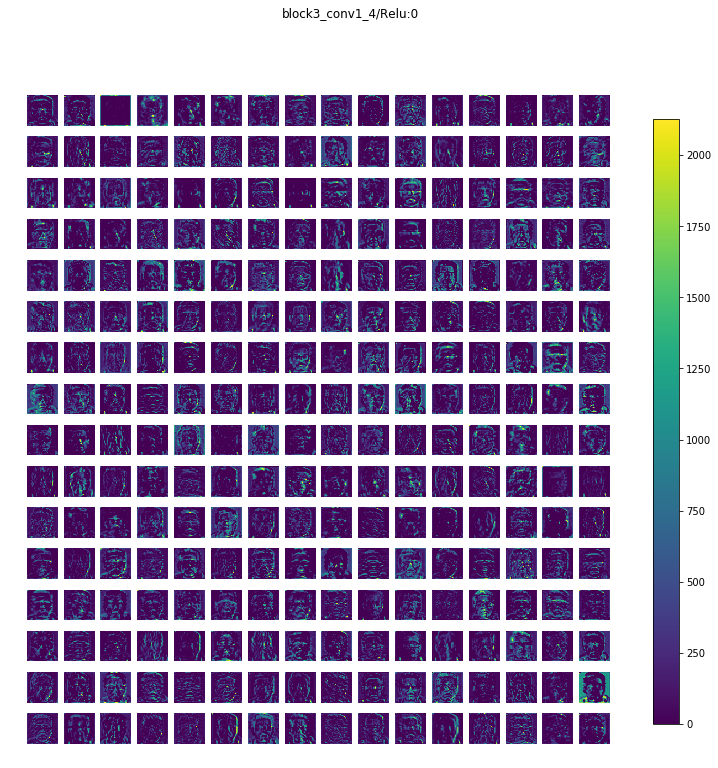

block3_conv2_4/Relu:0 (1, 56, 56, 256) 


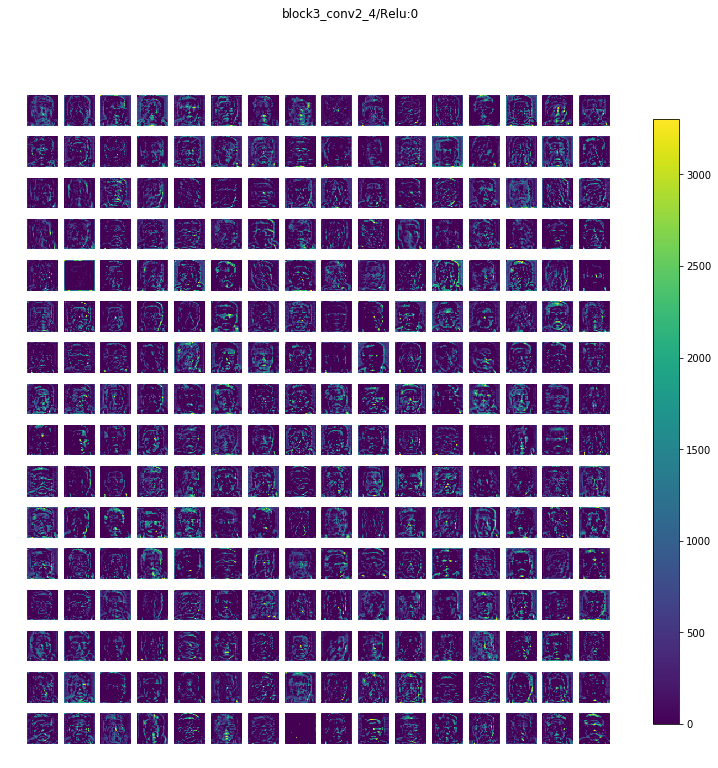

block3_conv3_4/Relu:0 (1, 56, 56, 256) 


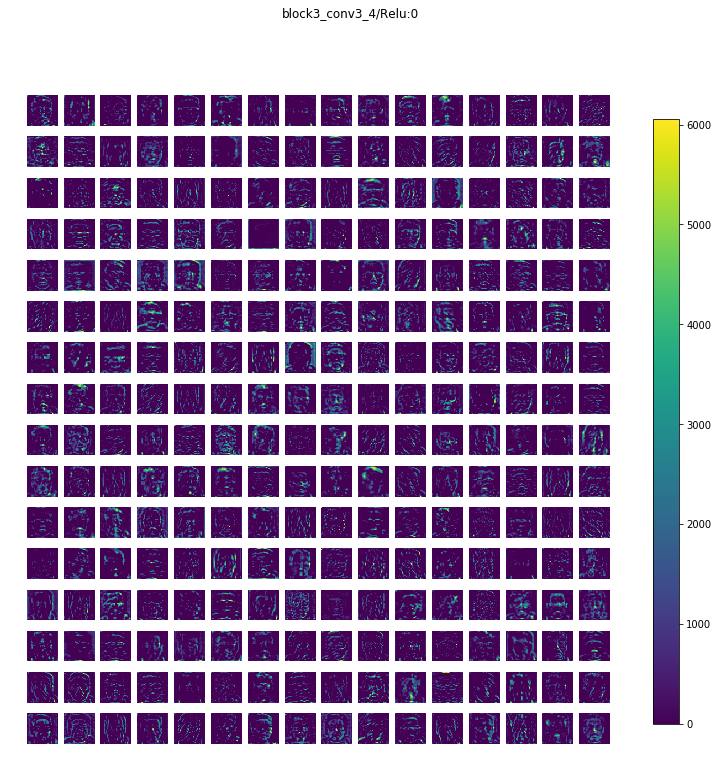

block3_pool_4/MaxPool:0 (1, 28, 28, 256) 


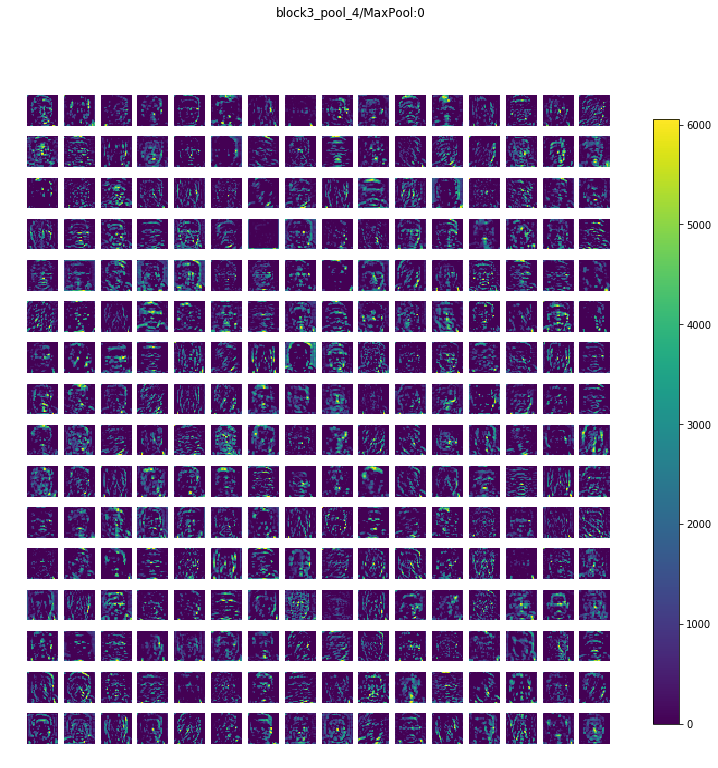

block4_conv1_4/Relu:0 (1, 28, 28, 512) 


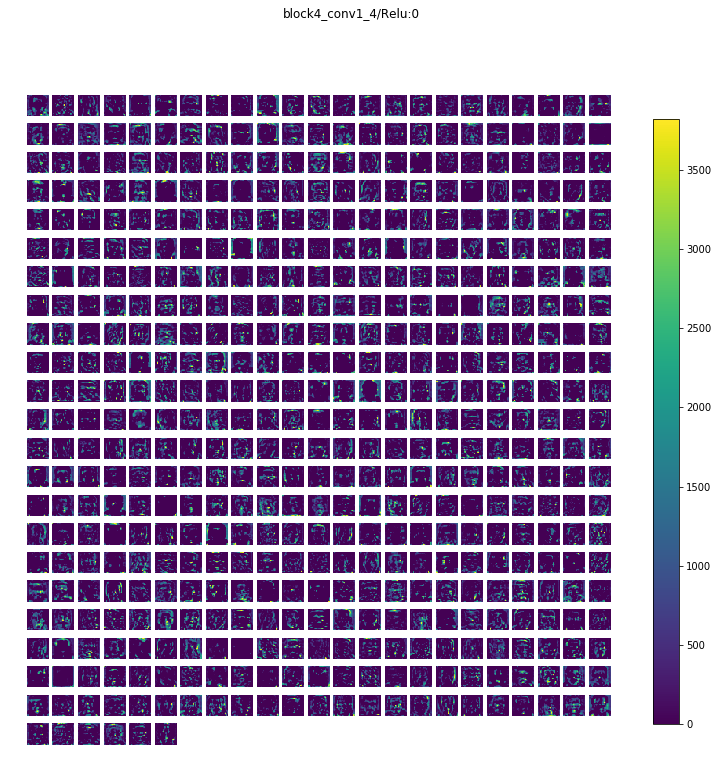

block4_conv2_4/Relu:0 (1, 28, 28, 512) 


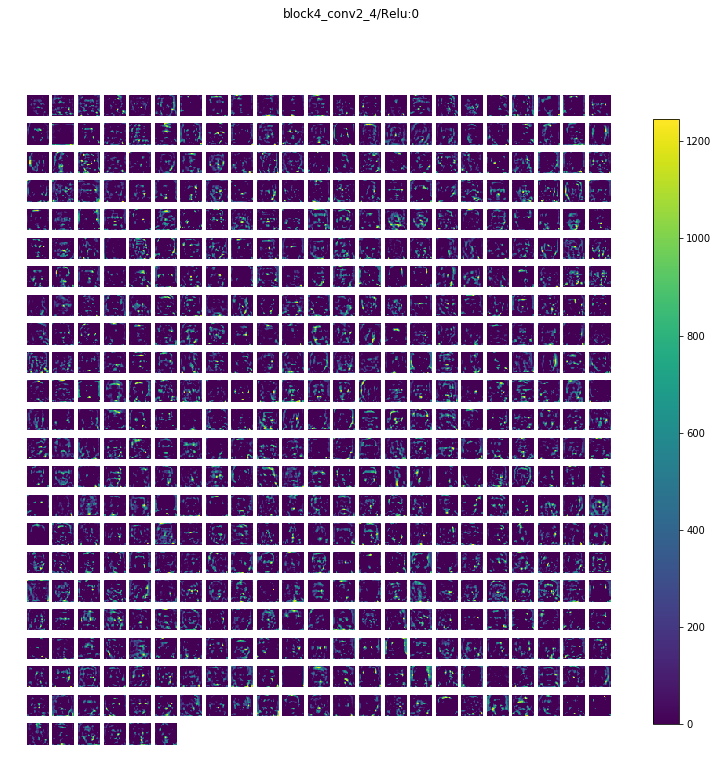

block4_conv3_4/Relu:0 (1, 28, 28, 512) 


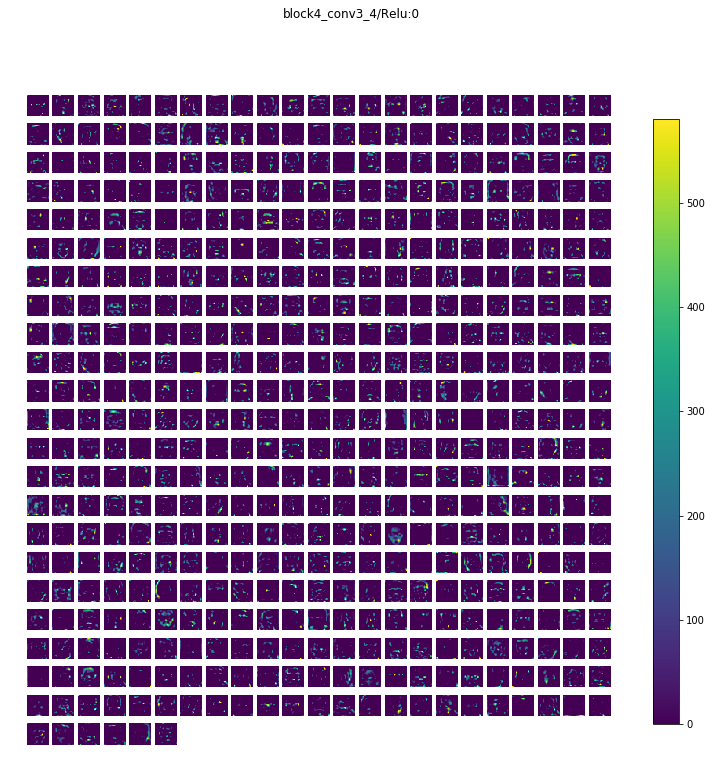

block4_pool_4/MaxPool:0 (1, 14, 14, 512) 


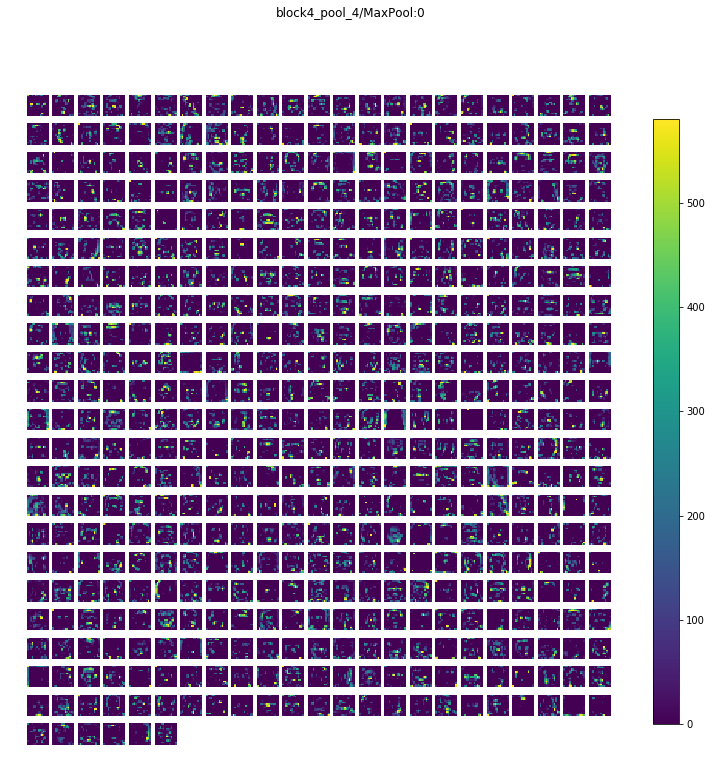

block5_conv1_4/Relu:0 (1, 14, 14, 512) 


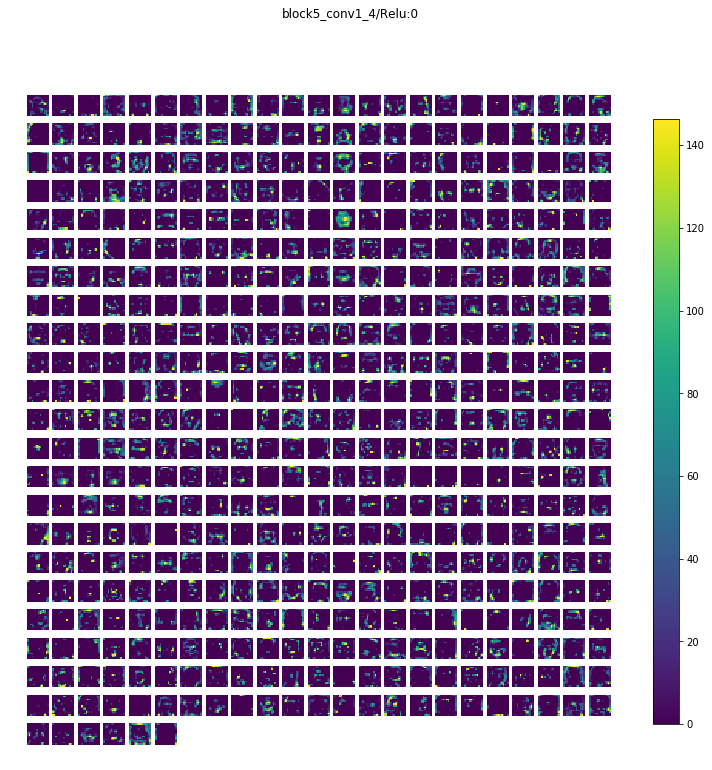

block5_conv2_4/Relu:0 (1, 14, 14, 512) 


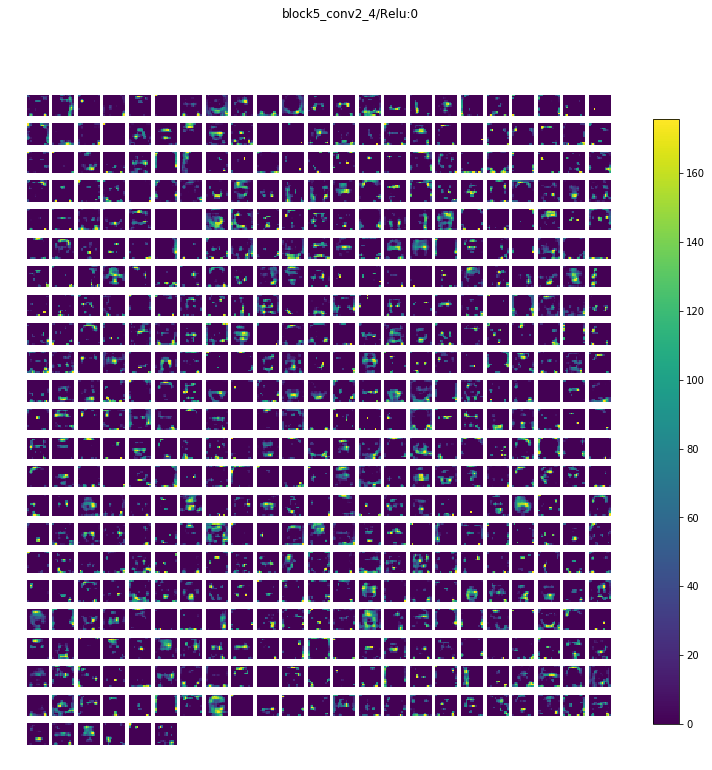

block5_conv3_4/Relu:0 (1, 14, 14, 512) 


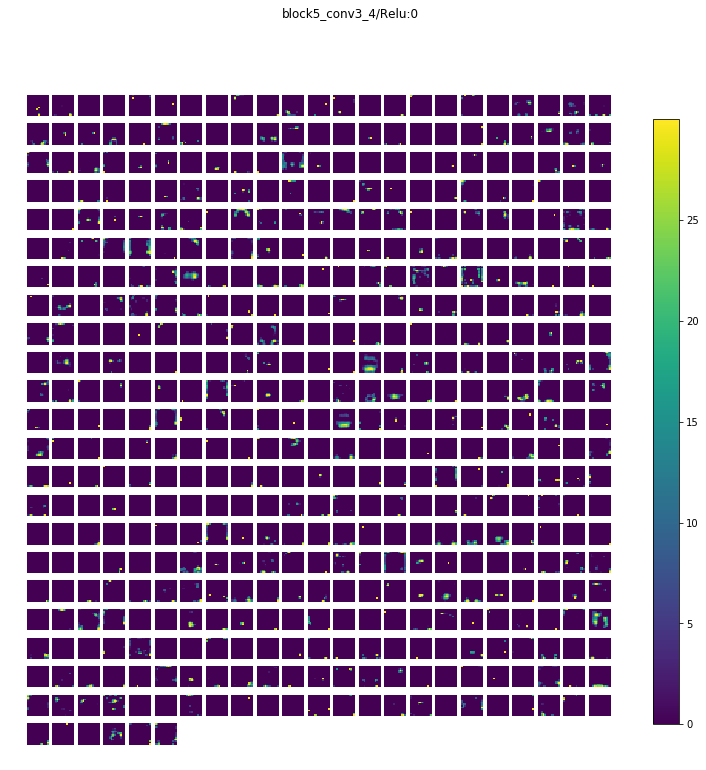

block5_pool_4/MaxPool:0 (1, 7, 7, 512) 


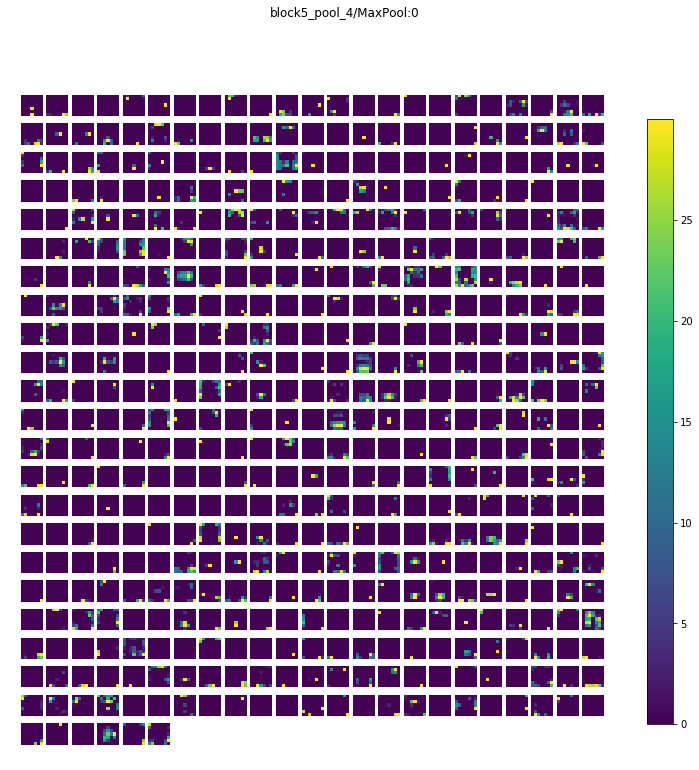

flatten_4/Reshape:0 (1, 25088) -> Skipped. 2D Activations.
fc1_4/Relu:0 (1, 4096) -> Skipped. 2D Activations.
fc2_4/Relu:0 (1, 4096) -> Skipped. 2D Activations.
predictions_4/Softmax:0 (1, 1000) -> Skipped. 2D Activations.


In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array

model = VGG16()

from PIL import Image
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/mitrish/EVA/master/Assets/Session10/tony_stark_avengers3_headscrupt_with_glasses.jpg?token=AF5UJSCAC3KZ2H2RWZEJN4S5IEXZY'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
image = image.resize((224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print('{} ({})'.format(label[1], label[2] * 100))

import keract

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
activations = keract.get_activations(model, image)
first = activations.get('block1_conv1/Relu:0')
keract.display_activations(activations)

# Assignment 10B

The Network in the paper CNN-based Segmentation of Medical Imaging Data is :-

![Network layout](https://github.com/KillerStrike17/EVA---Session-10-VGG/blob/master/network.png)

Thus when we list the layers we get the table as follows:

| Input   Layer     | 
| ----------------- | 
| Convolution (3x3) | 
| Contracting Block | 
| Convolution (3x3) | 
| Convolution (3x3) | 
| Contracting Block | 
| Convolution (3x3) | 
| Convolution (3x3) | 
| Contracting Block | 
| Convolution (3x3) | 
| Convolution (3x3) | 

we use the formulae for calculating the receptive field i.e.:

<img src="https://i2.wp.com/syncedreview.com/wp-content/uploads/2017/05/13.png" width="200" />


<img src="https://i0.wp.com/syncedreview.com/wp-content/uploads/2017/05/32.png" width="300" />

| Input   Layer     | Padding        | Strides | n<sub>in</sub> | n<sub>out</sub> | j<sub>in</sub> | j<sub>out</sub> | RF     |
| ----------------- | -------------- | ------- | -------------- | --------------- | -------------- | --------------- | ------ |
| Convolution (3x3) | Padding = Same | 1       | 128            | 128             | 1              | 1               | 3      |
| Contracting Block |                |         |                |                 |                |                 |        |
| Convolution (3x3) | Padding = Same | 2       | 128            | 64              | 1              | 2               | 5      |
| Convolution (3x3) | Padding = Same | 1       | 64             | 64              | 2              | 2               | 9      |
| Contracting Block |                |         |                |                 |                |                 |        |
| Convolution (3x3) | Padding = Same | 2       | 64             | 32              | 2              | 4               | 13     |
| Convolution (3x3) | Padding = Same | 1       | 32             | 32              | 4              | 4               | 21     |
| Contracting Block |                |         |                |                 |                |                 |        |
| Convolution (3x3) | Padding = Same | 2       | 32             | 16              | 4              | 8               | **29** |
| Convolution (3x3) | Padding = Same | 1       | 16             | 16              | 8              | 8               | **45** |

Thus based on the calculations shown in the table, the switch from 29 to 45 is because of

29 + 2*8 = 
29 + 16 =
45








